In [144]:
#Librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Exportar the data




In [145]:
nonormal = []
normal = []
def breakdown_vars(df):
    """
    This function allow us categorize accodign to numerical or not
    """
    for t in df.columns:

        if df[t].dtypes=="int64" or df[t].dtypes=="float64":
                n,p = stats.shapiro(df[t])
                if p<0.05:
                    nonormal.append(t)
                else:
                    normal.append(t)

    print(f'Variables numéricas no normales: {nonormal}')
    print(f'Variables numéricas normales: {normal}')

In [146]:
url="https://raw.githubusercontent.com/MaryFER104/data-/refs/heads/main/Movies%20Dataset.csv"

In [147]:
df= pd.read_csv(url)
df.head(10)

,Title,Genre,Year,Budget,Revenue,IMDB_Rating
0,The Last Journey,Drama,2020,11000000,3.404969e+07,4.9
1,Infinite Dreams,Drama,2004,178000000,5.504360e+08,6.6
2,Code of Shadows,Romance,2018,13000000,7.855773e+06,4.7
3,Ocean Whisper,Action,2016,148000000,1.769979e+08,7.2
4,Forgotten Realm,Romance,2017,61000000,1.264061e+08,NaN
5,Neon City,Comedy,2000,80M,3.621845e+08,5.1
6,Silent Horizon,Fantasy,2006,31000000,2.556292e+07,4.1
7,Echoes of Tomorrow,Sci-Fi,2011,211000000,1.375882e+08,NaN
8,Digital Frontier,NaN,2003,25000000,6.080356e+07,8.2
9,Whispers in the Dark,Fantasy,2019,152000000,1.782975e+08,3.9


In [148]:
df.describe()

,Revenue,IMDB_Rating
count,1.900000e+01,18.000000
mean,1.734479e+08,5.883333
std,1.366885e+08,1.487299
min,7.855773e+06,3.900000
25%,5.965693e+07,4.900000
50%,1.502366e+08,5.550000
75%,2.214591e+08,6.700000
max,5.504360e+08,9.100000


In [149]:
df.dtypes

,0
Title,object
Genre,object
Year,object
Budget,object
Revenue,float64
IMDB_Rating,float64




*   Pasos a seguir:

*   Poner el tipo de variables correctas
*   Asignar valores nulos






In [150]:
for var in df.columns:
  print(df[var].unique())

['The Last Journey' 'Infinite Dreams' 'Code of Shadows' 'Ocean Whisper'
 'Forgotten Realm' 'Neon City' 'Silent Horizon' 'Echoes of Tomorrow'
 'Digital Frontier' 'Whispers in the Dark' 'Iron Legacy' 'Solar Storm'
 'Quantum Hearts' 'Crimson Night' 'The Lost Signal' 'Beyond the Stars'
 'Broken Destiny' 'Shattered Skies' 'Eternal Voyage' 'Mystic River']
['Drama' 'Romance' 'Action' 'Comedy' 'Fantasy' 'Sci-Fi' nan 'Thriller']
['2020' '2004' '2018' '2016' '2017' '2000' '2006' '2011' '2003' '2019'
 'Two Thousand' '2007' '2022' '2001' '2008']
['11000000' '178000000' '13000000' '148000000' '61000000' '80M' '31000000'
 '211000000' '25000000' '152000000' '202000000' '102000000' '99000000'
 '160000000' '123000000' '180000000' '215000000' '59000000' '41000000']
[3.40496942e+07 5.50436005e+08 7.85577348e+06 1.76997903e+08
 1.26406131e+08 3.62184522e+08 2.55629240e+07 1.37588152e+08
 6.08035552e+07 1.78297530e+08 3.05597290e+08 1.50236576e+08
            nan 2.24855568e+08 2.94298123e+08 1.31655434e+0

In [151]:
#inconsistencias en variable BUDGET
df['Budget'] = df['Budget'].str.replace(r'(\d+)M', lambda x: str(int(x.group(1)) * 1000000), regex=True).astype(np.float64)

In [152]:
df['Year'] = df['Year'].str.replace(r'Two Thousand', '2000', regex=True).astype(int)



In [153]:
df.dtypes

,0
Title,object
Genre,object
Year,int64
Budget,float64
Revenue,float64
IMDB_Rating,float64


Variables en el tipo correcto


*  sustituir valores nan, de acuerdo a su distribución para variables numéricas.
*   Elemento de la lista



In [154]:
#Saber valores nulos: las columnas con mas valores nulos;proporción
df.isnull().sum().sort_values(ascending=False) / len(df)

,0
Genre,0.181818
IMDB_Rating,0.181818
Revenue,0.136364
Title,0.000000
Budget,0.000000
Year,0.000000


In [155]:
breakdown_vars(df)

Variables numéricas no normales: ['Year']
Variables numéricas normales: ['Budget', 'Revenue', 'IMDB_Rating']


In [156]:
df.fillna({'IMDB_Rating': df['IMDB_Rating'].mean(),
           'Revenue': df['Revenue'].mean()},
          inplace=True)


In [157]:
#el valor más frecuente se usara para imputar nan
df["Genre"].value_counts()

,count
Genre,
Drama,5
Fantasy,3
Comedy,3
Thriller,3
Romance,2
Action,1
Sci-Fi,1


In [158]:
df['Genre'] = df['Genre'].fillna('Drama')

In [159]:
#todos los datos listos; no hay valores nulos
df.isnull().sum()

,0
Title,0
Genre,0
Year,0
Budget,0
Revenue,0
IMDB_Rating,0


# \Insights


In [160]:
#generos más rentables
genre_revenues = df.groupby("Genre")["Revenue"].mean().sort_values(ascending=True)
print(genre_revenues.head())

Genre
Romance    6.713095e+07
Fantasy    1.257695e+08
Sci-Fi     1.375882e+08
Drama      1.664066e+08
Action     1.769979e+08
Name: Revenue, dtype: float64


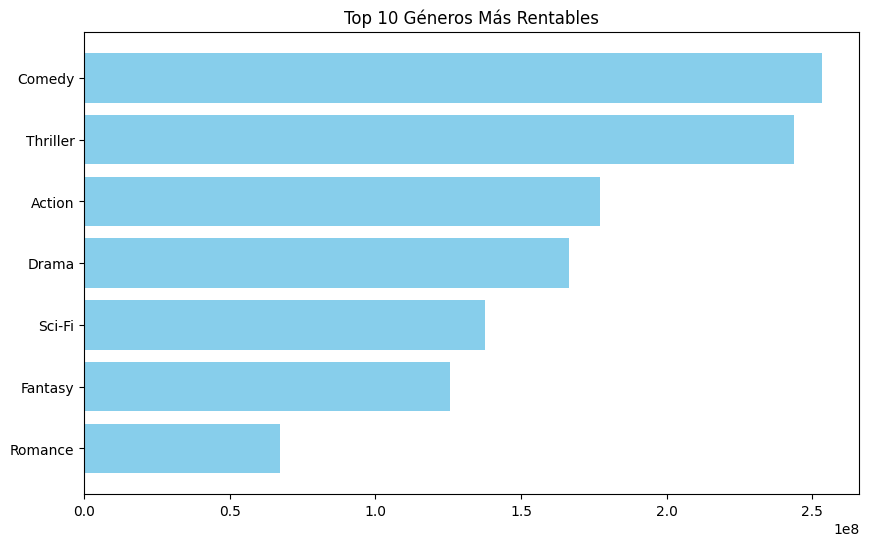

In [161]:
plt.figure(figsize=(10, 6))
plt.barh(genre_revenues.index, genre_revenues.values, color='skyblue')
plt.title('Top 10 Géneros Más Rentables')
plt.show()

In [162]:
#calificacion por año
year_imdb = df.groupby("Year")["IMDB_Rating"].mean()
print(year_imdb)

Year
2000    4.550000
2001    5.300000
2003    8.200000
2004    6.600000
2006    4.100000
2007    7.491667
2008    6.700000
2011    6.591667
2016    7.200000
2017    5.883333
2018    4.700000
2019    3.900000
2020    5.145833
2022    6.150000
Name: IMDB_Rating, dtype: float64


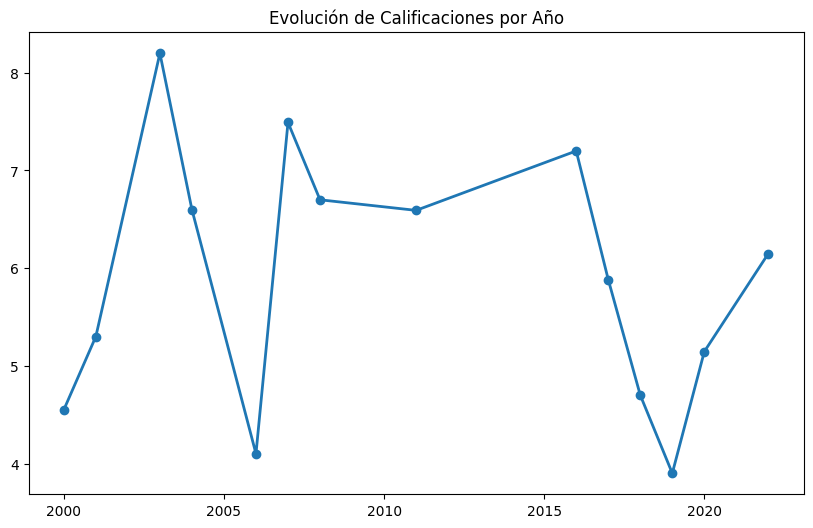

In [163]:
plt.figure(figsize=(10, 6))
plt.plot(year_imdb.index, year_imdb.values, marker='o', linewidth=2)
plt.title('Evolución de Calificaciones por Año')
plt.show()

In [164]:
#Relacion entre Budget	y Revenue

ab = ["Budget","Revenue"]

corr = df[ab].corr()
print(corr)

           Budget   Revenue
Budget   1.000000  0.564119
Revenue  0.564119  1.000000


<Axes: >

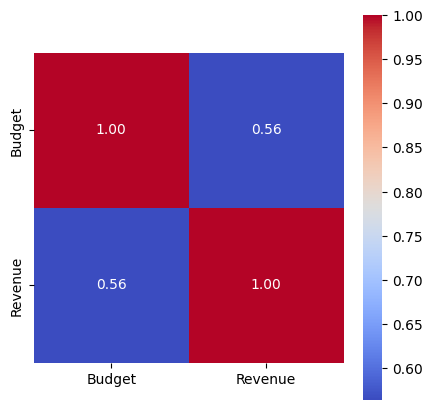

In [165]:
#tienen una relación positiva; tanto presupuesto hacia ingreo; como ingreso hacia presupuesto
plt.figure(figsize=(5,5))
sns.heatmap(corr, square = True, cmap = 'coolwarm', annot = True, fmt = '.2f')

# Guardar Base de datos

In [166]:
df.head(10)

,Title,Genre,Year,Budget,Revenue,IMDB_Rating
0,The Last Journey,Drama,2020,11000000.0,3.404969e+07,4.900000
1,Infinite Dreams,Drama,2004,178000000.0,5.504360e+08,6.600000
2,Code of Shadows,Romance,2018,13000000.0,7.855773e+06,4.700000
3,Ocean Whisper,Action,2016,148000000.0,1.769979e+08,7.200000
4,Forgotten Realm,Romance,2017,61000000.0,1.264061e+08,5.883333
5,Neon City,Comedy,2000,80000000.0,3.621845e+08,5.100000
6,Silent Horizon,Fantasy,2006,31000000.0,2.556292e+07,4.100000
7,Echoes of Tomorrow,Sci-Fi,2011,211000000.0,1.375882e+08,5.883333
8,Digital Frontier,Drama,2003,25000000.0,6.080356e+07,8.200000
9,Whispers in the Dark,Fantasy,2019,152000000.0,1.782975e+08,3.900000


# exportar base

In [167]:
df.head(10)

,Title,Genre,Year,Budget,Revenue,IMDB_Rating
0,The Last Journey,Drama,2020,11000000.0,3.404969e+07,4.900000
1,Infinite Dreams,Drama,2004,178000000.0,5.504360e+08,6.600000
2,Code of Shadows,Romance,2018,13000000.0,7.855773e+06,4.700000
3,Ocean Whisper,Action,2016,148000000.0,1.769979e+08,7.200000
4,Forgotten Realm,Romance,2017,61000000.0,1.264061e+08,5.883333
5,Neon City,Comedy,2000,80000000.0,3.621845e+08,5.100000
6,Silent Horizon,Fantasy,2006,31000000.0,2.556292e+07,4.100000
7,Echoes of Tomorrow,Sci-Fi,2011,211000000.0,1.375882e+08,5.883333
8,Digital Frontier,Drama,2003,25000000.0,6.080356e+07,8.200000
9,Whispers in the Dark,Fantasy,2019,152000000.0,1.782975e+08,3.900000


In [168]:
df.to_csv('dataset.csv', index=False)

In [169]:
from google.colab import files
files.download('dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>